# Exploratory Data Analysis with Python Libraries


<br>

<u>**1. International Monetary Fund**</u><br>

Uses the excel file called `WEOApr2020all.xlsx`. This file was obtained from the [International Monetary Fund](https://www.imf.org/external/pubs/ft/weo/2020/01/weodata/index.aspx) and it contains data from the World Economic Outlook that pertains to national accounts, inflation, unemployment rates, balance of payments, fiscal indicators, trade for countries and country groups (aggregates), and commodity prices whose data are reported by the IMF.

**Note:** The data is in a tabular format and **delimited** with a **tab** as a separator.

<br>

<u>**2. AirBnB Open Data - New York City**</u><br>

Uses the CSV file called `AB_NYC_2019.csv`. This file was obtained from [Kaggle.com](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) and it contains data that pertains to hosts, geographical availability, etc.

**Note:** The data is in a tabular format and **delimited** with a **comma** as a separator.

<br>

You are encouraged to open the file in a spreadsheet program to examine the data. Your task is to use Python and the following list of libraries to code the processes defined by the questions. **Leave in the relevant codes used for testing but comment them out before submission.** You are also encouraged to use as many code cells as necessary to complete the tasks.

**Note**: Take care not to overwrite your loaded dataset.

**Permissible Libraries**

- Pandas
- Matplotlib

**Deliverables**:

- Follow the instructions as detailed in this file.
- Do not modify any cell within this file unless otherwise stated.
- Once you have completed this assignment, navigate to `Kernel` in the menu and click on `Restart Kernel and Run All Cells...`. You are to ensure that each cell has been completed and that they run without errors.
- Before submitting, click on `Restart Kernel and Clear All Outputs...`. Then, zip all files in the format `CET2011_P02_<trainee_name>.zip`.
- Failure to do so will be awarded **NYC**.

---


# Personal memo

### Evaluation Criteria:

- Analytical Rigor: Depth and accuracy of the analysis.
- Visual Excellence: Clarity, interactivity, and aesthetic appeal of the visualizations.
- Narrative Strength: The ability to tell a compelling data story, highlighting critical insights.
- Innovation: Creativity in the approach to visual analysis and presentation.

### Deliverables:

- A Jupyter Notebook with the complete analysis and visualizations.
- An interactive dashboard showcasing the visual analysis.
- A detailed report or presentation encapsulating the narrative and key insights for decision-makers.


# Install package to read excel from Pandas


In [148]:
%pip install --quiet -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## General Part

Load the required libraries.


In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Library settings


In [150]:
pd.set_option("display.max_columns", None)

---

## International Monetary Fund

**Q1)** Load the data into memory using Pandas; perform a preliminary first clean of the data and return this data.

- Perform standard checks such as missing data (`NaN` or `None`), datatypes, etc.
- Ensure that all the column names are of the datatype `string`.
- Assess whether it is necessary to remove the last two rows of the DataFrame for your specific analysis.


In [151]:
imf_csv_path = "datasets/WEOApr2020all.xlsx"
assert os.path.exists(imf_csv_path)
df = pd.read_excel(imf_csv_path)
df.head(2)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
0,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,Source: National Statistics Office Latest actu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.692,0.671,11.830,5.361,13.340,3.863,20.585,8.438,6.479,13.968,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,4.495,2018.0
1,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,Source: National Statistics Office Latest actu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.835,20.852,21.557,24.858,26.983,31.404,33.252,40.403,44.323,48.180,55.963,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,79.678,2018.0


In [152]:
## Drop columns that are not used in visualization such as notes and codes.

In [153]:
redundant_col = "WEO Country Code	ISO	WEO Subject Code	Subject Notes	Units	Scale	Country/Series-specific Notes	Estimates Start After".split(
    "\t"
)
redundant_col

['WEO Country Code',
 'ISO',
 'WEO Subject Code',
 'Subject Notes',
 'Units',
 'Scale',
 'Country/Series-specific Notes',
 'Estimates Start After']

In [154]:
for c in redundant_col:
    if c in df.columns:
        print(df[c].value_counts())
        print("*" * 100)

WEO Country Code
512                                                                         8
716                                                                         8
278                                                                         8
692                                                                         8
694                                                                         8
                                                                           ..
258                                                                         8
656                                                                         8
654                                                                         8
336                                                                         8
International Monetary Fund, World Economic Outlook Database, April 2020    1
Name: count, Length: 195, dtype: int64
**************************************************************************************

In [155]:
# Todo:
# country_info = {country: (ISO, Estimates_Start_After}

In [156]:
# Drop redundant colaumns
for c in redundant_col:
    if c in df.columns:
        df.drop(columns=c, inplace=True)

df.head(2)

,Country,Subject Descriptor,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,"Gross domestic product, constant prices",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.692,0.671,11.830,5.361,13.340,3.863,20.585,8.438,6.479,13.968,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,4.495
1,Afghanistan,"Gross domestic product, current prices",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.835,20.852,21.557,24.858,26.983,31.404,33.252,40.403,44.323,48.180,55.963,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,79.678


## \* Assess whether it is necessary to remove the last two rows of the DataFrame for your specific analysis.

### Check missing values per row to decide any rows to discard

Discard row 1552 and 1553 where all elements in the rows are missing values.


In [157]:
(df.isna().sum(axis=1) / len(df.columns)).sort_values(ascending=False)[:5]

1553    1.000000
1552    1.000000
877     0.954545
701     0.954545
709     0.954545
dtype: float64

In [158]:
df.iloc[[1553, 1552]]

,Country,Subject Descriptor,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
df.drop(index=[1552, 1553], inplace=True)
(df.isna().sum(axis=0) / df.shape[0]).sort_values(ascending=False)[:5]

1980    0.467139
1981    0.428479
1982    0.420747
1983    0.414304
1984    0.410438
dtype: float64

## \* Perform standard checks such as missing data (`NaN` or `None`), datatypes, etc.


In [160]:
# Percentage of rows with any missing data
miss_row = df.isna().any(axis=1)
len(miss_row[miss_row].index) / len(miss_row)
df.iloc[miss_row[miss_row].index]

,Country,Subject Descriptor,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,"Gross domestic product, constant prices",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.692,0.671,11.830,5.361,13.340,3.863,20.585,8.438,6.479,13.968,5.683,2.697,0.988,2.164,2.889,2.664,3.037,-3.007,4.495
1,Afghanistan,"Gross domestic product, current prices",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.835,20.852,21.557,24.858,26.983,31.404,33.252,40.403,44.323,48.180,55.963,60.181,62.948,64.231,66.301,69.501,73.091,76.624,74.792,79.678
2,Afghanistan,"Gross domestic product per capita, constant pr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.398,-3.112,8.042,2.194,9.143,1.286,17.527,5.431,3.234,10.299,2.236,-0.521,-1.941,-0.547,0.358,1.268,1.654,-4.291,3.063
3,Afghanistan,"Inflation, average consumer prices",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.663,16.358,10.569,6.785,8.681,26.419,-6.811,2.179,11.804,6.441,7.386,4.674,-0.662,4.384,4.976,0.626,2.302,4.711,4.451
4,Afghanistan,"Inflation, end of period consumer prices",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.530,13.266,10.562,4.285,16.092,18.814,-9.836,10.246,9.312,5.875,7.241,1.487,1.131,4.588,3.041,0.755,2.773,4.5,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,Zimbabwe,"Inflation, average consumer prices",NaN,5.556,0.59,-8.452,-1.857,-16.01,10.666,12.785,-1.057,-3.847,1.345,-13.143,-2.998,0.376,-2.761,15.227,6.006,-0.965,-28.023,-13.431,4.475,-37.198,-34.445,-8.565,113.569,-31.522,32.974,-72.729,156.964,6.216,3.045,3.470,3.720,1.632,-0.213,-2.410,-1.558,0.907,10.607,255.292,319.036,3.700
1548,Zimbabwe,"Inflation, end of period consumer prices",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.670,3.217,4.920,2.914,0.331,-0.796,-2.473,-0.898,3.430,42.074,521.150,154.297,3.000
1549,Zimbabwe,Unemployment rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Zimbabwe,General government net lending/borrowing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.265,-2.150,-2.523,-1.804,-2.176,0.619,-2.164,0.807,-0.621,-0.421,-1.418,-6.242,-8.113,-4.499,-2.575,-4.931,-1.518


In [161]:
miss_row = df.isna().any(axis=1)
miss_col = df.isna().any(axis=0)
df_mising = df[["Country", "Subject Descriptor"] + list(miss_col[miss_col].index)].iloc[
    miss_row[miss_row].index
]
df_mising.to_csv("missing.csv")

In [162]:
# List countries where the missing data belongs to
df_mising.Country.value_counts(normalize=True).sort_values(ascending=False)

Country
Afghanistan      0.010811
Palau            0.010811
Timor-Leste      0.010811
Tajikistan       0.010811
South Sudan      0.010811
                   ...   
Panama           0.001351
Bangladesh       0.001351
Algeria          0.001351
United States    0.001351
Paraguay         0.001351
Name: proportion, Length: 182, dtype: float64

## Convert column names to string


In [163]:
before = set([type(c) for c in df.columns])
# type {type_: [c for c in df.columns if type(c) == type_] for type_ in list(set(type(c)) for c in df.columns)}
df.columns = map(str, list(df.columns))
after = set([type(c) for c in df.columns])
print(f"before {before}\nafter {after}")
### \* Ensure that all the column names are of the datatype `string`.
for c in df.columns:
    assert type(c) == str

before {<class 'int'>, <class 'str'>}
after {<class 'str'>}


In [164]:
print(df.shape)
df.info()

(1552, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             1552 non-null   object 
 1   Subject Descriptor  1552 non-null   object 
 2   1980                827 non-null    object 
 3   1981                887 non-null    object 
 4   1982                899 non-null    object 
 5   1983                909 non-null    float64
 6   1984                915 non-null    float64
 7   1985                929 non-null    float64
 8   1986                937 non-null    object 
 9   1987                942 non-null    float64
 10  1988                955 non-null    float64
 11  1989                965 non-null    float64
 12  1990                1021 non-null   object 
 13  1991                1064 non-null   object 
 14  1992                1113 non-null   float64
 15  1993                1183 non-null   float64


## Background

This dataset is about yearly World Economic Outlook (WEO) from 2018 to 2021.

it contains data from the World Economic Outlook that pertains to national accounts,

1. inflation,
1. unemployment rates,
1. balance of payments,
1. fiscal indicators,
1. trade for countries and country groups (aggregates), and
1. commodity prices


# Dataset statistical information

Statistical information of year 1980, 1981 not shown because theire numerical values were storedas string, change it to float64


In [165]:
df.describe()

,1983,1984,1985,1987,1988,1989,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2021
count,909.000000,915.000000,929.000000,942.000000,955.000000,965.000000,1113.000000,1183.000000,1202.000000,1245.000000,1272.000000,1293.000000,1317.000000,1333.000000,1372.000000,1403.000000,1414.000000,1422.000000,1431.000000,1438.000000,1438.000000,1440.000000,1442.000000,1444.000000,1445.000000,1442.000000,1448.000000,1450.000000,1456.000000,1455.000000,1455.000000,1458.000000,1456.000000,1451.000000,1432.000000
mean,24.089113,29.973714,49.160062,44.857137,39.625510,49.663190,43.476935,97.806560,88.577191,47.552335,44.248220,38.978293,37.080954,39.281696,41.309449,40.499236,41.456805,43.876414,47.328531,50.625901,55.255661,59.330948,62.055967,59.192219,64.473786,68.825349,71.633731,74.672724,78.056525,81.144135,85.391888,90.797095,229.419623,120.324225,126.706373
std,148.780558,182.468504,499.382977,468.612883,266.522987,361.915612,292.319825,623.111253,817.558372,312.133880,315.353145,300.347736,310.158770,326.696540,343.955996,353.663178,366.548244,385.848685,413.267206,444.857562,480.343967,516.915821,539.819240,547.456606,584.523877,624.775389,662.823392,703.229538,747.539290,790.720242,833.655906,889.376246,3928.414080,1167.001207,1238.569707
min,-154.626000,-114.382000,-89.328000,-157.962000,-208.495000,-76.171000,-557.499000,-217.936000,-487.312000,-123.416000,-124.557000,-32.429000,-90.323000,-59.742000,-51.165000,-57.331000,-84.105000,-43.796000,-35.398000,-31.522000,-39.037000,-72.729000,-49.471000,-27.732000,-32.784000,-66.657000,-54.054000,-40.521000,-78.446000,-130.796000,-113.180000,-43.464000,-44.592000,-42.227000,-74.001000
25%,-0.722000,0.382000,0.160000,0.141250,0.300500,0.449000,-0.982000,-0.916500,0.116250,0.169000,0.500000,0.266000,-0.505000,-0.648000,-0.036000,-0.268000,-0.100250,0.127750,0.822000,1.042000,1.519000,1.585250,0.515500,-2.741000,0.159000,0.410500,-0.199750,-0.193750,-0.214250,-0.859000,-0.556000,0.106750,0.355000,-0.007000,0.441750
50%,3.335000,4.200000,3.624000,3.565000,4.143000,3.986000,3.204000,3.192000,3.940000,3.937000,3.664500,3.749000,3.100000,2.696000,3.630000,2.878000,2.826500,3.135500,3.781000,3.915500,4.532500,4.863000,4.683500,1.634500,3.491000,3.908000,3.142500,2.578000,2.447000,2.104000,2.163000,2.524000,2.440500,2.224000,3.000000
75%,10.039000,10.285000,9.695000,9.909000,10.243000,10.282000,9.950000,10.317500,11.227250,10.043000,9.573000,8.692000,8.071000,7.796000,8.372750,7.774500,7.965000,8.447000,8.576500,8.795000,9.031000,8.908250,10.236500,6.851750,7.612000,8.084250,7.316000,6.780500,6.483750,6.288000,6.203000,6.115750,6.001000,5.662000,6.280500
max,3634.030000,4037.650000,11749.630000,13109.500000,5236.430000,7428.700000,6520.330000,10896.200000,23773.100000,7639.750000,8073.130000,8577.550000,9062.830000,9630.700000,10252.350000,10581.830000,10936.450000,11458.250000,12213.730000,13036.630000,13814.600000,14451.880000,14712.830000,14448.930000,14992.050000,15542.600000,16197.050000,16784.830000,18205.300000,19664.070000,21228.380000,23130.720000,130060.240000,27306.980000,30956.730000


In [166]:
print(f"shape {df.shape}")
df.info(10)

shape (1552, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             1552 non-null   object 
 1   Subject Descriptor  1552 non-null   object 
 2   1980                827 non-null    object 
 3   1981                887 non-null    object 
 4   1982                899 non-null    object 
 5   1983                909 non-null    float64
 6   1984                915 non-null    float64
 7   1985                929 non-null    float64
 8   1986                937 non-null    object 
 9   1987                942 non-null    float64
 10  1988                955 non-null    float64
 11  1989                965 non-null    float64
 12  1990                1021 non-null   object 
 13  1991                1064 non-null   object 
 14  1992                1113 non-null   float64
 15  1993                1183 non-null   fl

In [167]:
# Get column nams for year
# import numpy as np

# year_col = [c for c in df.columns if c[:2] in ["20", "19"]]
# df[year_col] = df[year_col].applymap(lambda x: x if x == "" else float(x))
# df[year_col].describe()

| WEO indictor                                             | Subject Descriptor Attribute Category                                                                                                   |
| -------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| inflation,                                               | Inflation, average consumer prices<br>Inflation, end of period consumer prices<br><br>                                                  |
| unemployment rates,                                      | Unemployment rate                                                                                                                       |
| balance of payments,                                     | Current account balance                                                                                                                 |
| fiscal indicators,                                       | Gross domestic product, constant prices<br>Gross domestic product, current prices<br>Gross domestic product per capita, constant prices |
| trade for countries and country groups (aggregates), and | General government net lending/borrowing                                                                                                |
| commodity prices                                         |                                                                                                                                         |


## Remove last 2 rows # Removed


In [168]:
# display(df_imf[df_imf["Country"].isna()])
# df_imf[df_imf["Country"].isna()].isna().sum(axis=1)

In [169]:
# df_imf = df_imf.iloc[:-2]
# df_imf.shape

**Q2)** Using an appropriate graph, visualize the unemployment rates from 2010 - 2019 for the 5 countries with the highest mean unemployment rates over these 10 years.

- Assume all `NaN` values are 0s (i.e. change all `NaN` values to 0).
- A properly labeled figure of size (13 by 10) must be displayed as the end result at the last code cell of this question.
- Save the figure with a dpi of `200` and name it `imf_plot01.png` (This file is to be submitted).


In [170]:
df["Subject Descriptor"].unique()

array(['Gross domestic product, constant prices',
       'Gross domestic product, current prices',
       'Gross domestic product per capita, constant prices',
       'Inflation, average consumer prices',
       'Inflation, end of period consumer prices', 'Unemployment rate',
       'General government net lending/borrowing',
       'Current account balance'], dtype=object)

In [171]:
# scope down dataframe to reduce memory
targeted_years = list(str(y) for y in range(2010, 2020))
df1 = df[["Country", "Subject Descriptor"] + targeted_years]
display(df1.head())
df1.info()

,Country,Subject Descriptor,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,"Gross domestic product, constant prices",8.438,6.479,13.968,5.683,2.697,0.988,2.164,2.889,2.664,3.037
1,Afghanistan,"Gross domestic product, current prices",44.323,48.180,55.963,60.181,62.948,64.231,66.301,69.501,73.091,76.624
2,Afghanistan,"Gross domestic product per capita, constant pr...",5.431,3.234,10.299,2.236,-0.521,-1.941,-0.547,0.358,1.268,1.654
3,Afghanistan,"Inflation, average consumer prices",2.179,11.804,6.441,7.386,4.674,-0.662,4.384,4.976,0.626,2.302
4,Afghanistan,"Inflation, end of period consumer prices",10.246,9.312,5.875,7.241,1.487,1.131,4.588,3.041,0.755,2.773


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             1552 non-null   object 
 1   Subject Descriptor  1552 non-null   object 
 2   2010                1445 non-null   float64
 3   2011                1442 non-null   float64
 4   2012                1448 non-null   float64
 5   2013                1450 non-null   float64
 6   2014                1456 non-null   float64
 7   2015                1455 non-null   float64
 8   2016                1455 non-null   float64
 9   2017                1458 non-null   float64
 10  2018                1456 non-null   float64
 11  2019                1451 non-null   float64
dtypes: float64(10), object(2)
memory usage: 145.6+ KB


In [172]:
df1 = df1[df1["Subject Descriptor"] == "Unemployment rate"]
display(df1.head(2))
df1.info()

,Country,Subject Descriptor,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
5,Afghanistan,Unemployment rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Albania,Unemployment rate,14.0,14.0,13.4,15.9,17.5,17.1,15.2,13.7,12.3,12.0


<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 5 to 1549
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             194 non-null    object 
 1   Subject Descriptor  194 non-null    object 
 2   2010                112 non-null    float64
 3   2011                112 non-null    float64
 4   2012                112 non-null    float64
 5   2013                112 non-null    float64
 6   2014                112 non-null    float64
 7   2015                112 non-null    float64
 8   2016                112 non-null    float64
 9   2017                112 non-null    float64
 10  2018                110 non-null    float64
 11  2019                105 non-null    float64
dtypes: float64(10), object(2)
memory usage: 19.7+ KB


## Check is there any year with unemployment rate of zero before replacing NaN with zero


In [173]:
assert not df1[targeted_years].apply(lambda x: x == 0).any(axis=0).sum()

# Drop country that only has NaN for unemployment throughout 2010-2019

This is to avoid wrong impression that the mean unemployment rate of such country is zero, assume the NaN is replaced with Zero


In [174]:
# All country occur once only
# df1.Country.value_counts().sort_values()

In [175]:
# Set country as index
df1.set_index("Country", inplace=True)
df1.head()

,Subject Descriptor,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,
Afghanistan,Unemployment rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,Unemployment rate,14.000,14.000,13.400,15.900,17.5,17.100,15.200,13.700,12.300,12.000
Algeria,Unemployment rate,9.961,9.971,10.969,9.829,10.6,11.214,10.498,11.709,11.731,11.383
Angola,Unemployment rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,Unemployment rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
df1.drop(columns="Subject Descriptor", inplace=True)
df1.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,14.000,14.000,13.400,15.900,17.5,17.100,15.200,13.700,12.300,12.000
Algeria,9.961,9.971,10.969,9.829,10.6,11.214,10.498,11.709,11.731,11.383
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
row_isna_sum = df1.isna().sum(axis=1).sort_values(ascending=False)
row_isna_sum.head()

Country
Afghanistan    10
Nepal          10
Namibia        10
Mozambique     10
Montenegro     10
dtype: int64

In [178]:
row_index_to_drop = row_isna_sum[row_isna_sum == 10].index

In [179]:
# Drop the 80 countries from the analysis of mean unemployment rate
df1.drop(index=row_index_to_drop, inplace=True)
df1

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Albania,14.000,14.000,13.400,15.900,17.500,17.100,15.200,13.700,12.300,12.000
Algeria,9.961,9.971,10.969,9.829,10.600,11.214,10.498,11.709,11.731,11.383
Argentina,7.750,7.150,7.200,7.075,7.250,6.533,8.467,8.350,9.200,9.825
Armenia,19.000,18.400,17.300,16.200,17.600,18.500,18.000,17.800,20.400,17.707
Aruba,10.600,8.879,9.607,7.599,7.451,7.298,7.694,8.923,7.283,7.544
...,...,...,...,...,...,...,...,...,...,...
United Kingdom,7.900,8.100,7.975,7.575,6.200,5.375,4.875,4.425,4.075,3.825
United States,9.608,8.933,8.075,7.358,6.158,5.275,4.875,4.342,3.892,3.667
Uruguay,7.025,6.342,6.325,6.500,6.625,7.533,7.867,7.925,8.367,9.420


In [180]:
isna_row = df1.isna().any(axis=1)
isna_index = isna_row[isna_row].index
df2 = df1.loc[list(isna_index)]
df2

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,
Bhutan,3.300,3.100,2.100,2.900,2.600,2.500,2.100,3.138,NaN,NaN
Brunei Darussalam,NaN,9.300,8.500,7.700,6.900,7.700,8.500,9.300,9.316,9.316
Jamaica,12.375,12.400,13.925,15.275,13.750,13.500,13.200,11.650,9.125,NaN
Kosovo,NaN,NaN,30.900,30.000,35.300,32.900,27.500,30.500,29.600,25.700
Kuwait,2.072,2.078,1.986,1.902,1.722,1.322,1.248,1.280,1.087,NaN
Nigeria,5.092,5.957,10.566,9.955,7.841,9.000,13.375,17.462,22.562,NaN
São Tomé and Príncipe,14.628,14.127,13.590,13.525,13.472,13.433,13.416,13.472,NaN,NaN
Saudi Arabia,5.548,5.772,5.524,5.568,5.721,5.591,5.600,6.000,6.000,NaN
Syria,8.613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df2["Number non NA"] = 10 - df2.isna().sum(axis=1)
df2

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Number non NA
Country,,,,,,,,,,,
Bhutan,3.300,3.100,2.100,2.900,2.600,2.500,2.100,3.138,NaN,NaN,8
Brunei Darussalam,NaN,9.300,8.500,7.700,6.900,7.700,8.500,9.300,9.316,9.316,9
Jamaica,12.375,12.400,13.925,15.275,13.750,13.500,13.200,11.650,9.125,NaN,9
Kosovo,NaN,NaN,30.900,30.000,35.300,32.900,27.500,30.500,29.600,25.700,8
Kuwait,2.072,2.078,1.986,1.902,1.722,1.322,1.248,1.280,1.087,NaN,9
Nigeria,5.092,5.957,10.566,9.955,7.841,9.000,13.375,17.462,22.562,NaN,9
São Tomé and Príncipe,14.628,14.127,13.590,13.525,13.472,13.433,13.416,13.472,NaN,NaN,8
Saudi Arabia,5.548,5.772,5.524,5.568,5.721,5.591,5.600,6.000,6.000,NaN,9
Syria,8.613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [182]:
df2["Mean using api"] = df2[targeted_years].mean(axis=1)
df2

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Number non NA,Mean using api
Country,,,,,,,,,,,,
Bhutan,3.300,3.100,2.100,2.900,2.600,2.500,2.100,3.138,NaN,NaN,8,2.717250
Brunei Darussalam,NaN,9.300,8.500,7.700,6.900,7.700,8.500,9.300,9.316,9.316,9,8.503556
Jamaica,12.375,12.400,13.925,15.275,13.750,13.500,13.200,11.650,9.125,NaN,9,12.800000
Kosovo,NaN,NaN,30.900,30.000,35.300,32.900,27.500,30.500,29.600,25.700,8,30.300000
Kuwait,2.072,2.078,1.986,1.902,1.722,1.322,1.248,1.280,1.087,NaN,9,1.633000
Nigeria,5.092,5.957,10.566,9.955,7.841,9.000,13.375,17.462,22.562,NaN,9,11.312222
São Tomé and Príncipe,14.628,14.127,13.590,13.525,13.472,13.433,13.416,13.472,NaN,NaN,8,13.707875
Saudi Arabia,5.548,5.772,5.524,5.568,5.721,5.591,5.600,6.000,6.000,NaN,9,5.702667
Syria,8.613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8.613000


In [183]:
df2["sum"] = df2[targeted_years].sum(axis=1)

In [184]:
df2["Mean using formula"] = df2["sum"] / df2["Number non NA"]
df2

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Number non NA,Mean using api,sum,Mean using formula
Country,,,,,,,,,,,,,,
Bhutan,3.300,3.100,2.100,2.900,2.600,2.500,2.100,3.138,NaN,NaN,8,2.717250,21.738,2.717250
Brunei Darussalam,NaN,9.300,8.500,7.700,6.900,7.700,8.500,9.300,9.316,9.316,9,8.503556,76.532,8.503556
Jamaica,12.375,12.400,13.925,15.275,13.750,13.500,13.200,11.650,9.125,NaN,9,12.800000,115.200,12.800000
Kosovo,NaN,NaN,30.900,30.000,35.300,32.900,27.500,30.500,29.600,25.700,8,30.300000,242.400,30.300000
Kuwait,2.072,2.078,1.986,1.902,1.722,1.322,1.248,1.280,1.087,NaN,9,1.633000,14.697,1.633000
Nigeria,5.092,5.957,10.566,9.955,7.841,9.000,13.375,17.462,22.562,NaN,9,11.312222,101.810,11.312222
São Tomé and Príncipe,14.628,14.127,13.590,13.525,13.472,13.433,13.416,13.472,NaN,NaN,8,13.707875,109.663,13.707875
Saudi Arabia,5.548,5.772,5.524,5.568,5.721,5.591,5.600,6.000,6.000,NaN,9,5.702667,51.324,5.702667
Syria,8.613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8.613000,8.613,8.613000


In [185]:
# Error if api result different from formula result
# assert (df2["Mean using api"] == df2["Mean using formula"]).sum() == len(df2)

## Calculate mean using API to get top 5 countries rank by mean of unemployment rate


In [186]:
df1["Mean"] = df1[targeted_years].mean(axis=1)
df1_sorted_by_mean = df1.sort_values(by="Mean", ascending=False)
df1_sorted_by_mean

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean
Country,,,,,,,,,,,
Kosovo,NaN,NaN,30.900,30.000,35.300,32.900,27.500,30.500,29.600,25.700,30.3000
North Macedonia,32.050,31.375,31.000,29.000,28.025,26.050,23.750,22.375,20.725,17.250,26.1600
South Africa,24.875,24.800,24.875,24.725,25.100,25.350,26.725,27.450,27.125,28.700,25.9725
Bosnia and Herzegovina,27.202,27.600,28.000,27.500,27.500,27.700,25.400,20.500,18.400,15.700,24.5502
Greece,12.725,17.850,24.425,27.475,26.500,24.900,23.550,21.450,19.300,17.300,21.5475
...,...,...,...,...,...,...,...,...,...,...,...
Singapore,2.175,2.025,1.950,1.900,1.950,1.900,2.075,2.175,2.100,2.250,2.0500
Macao SAR,2.825,2.575,2.000,1.850,1.700,1.825,1.900,1.975,1.800,1.725,2.0175
Kuwait,2.072,2.078,1.986,1.902,1.722,1.322,1.248,1.280,1.087,NaN,1.6330


# Choose top 5 country according to above mean value


In [187]:
top_5_country = list(df1_sorted_by_mean.index)[:5]
print(top_5_country)

['Kosovo', 'North Macedonia', 'South Africa', 'Bosnia and Herzegovina', 'Greece']


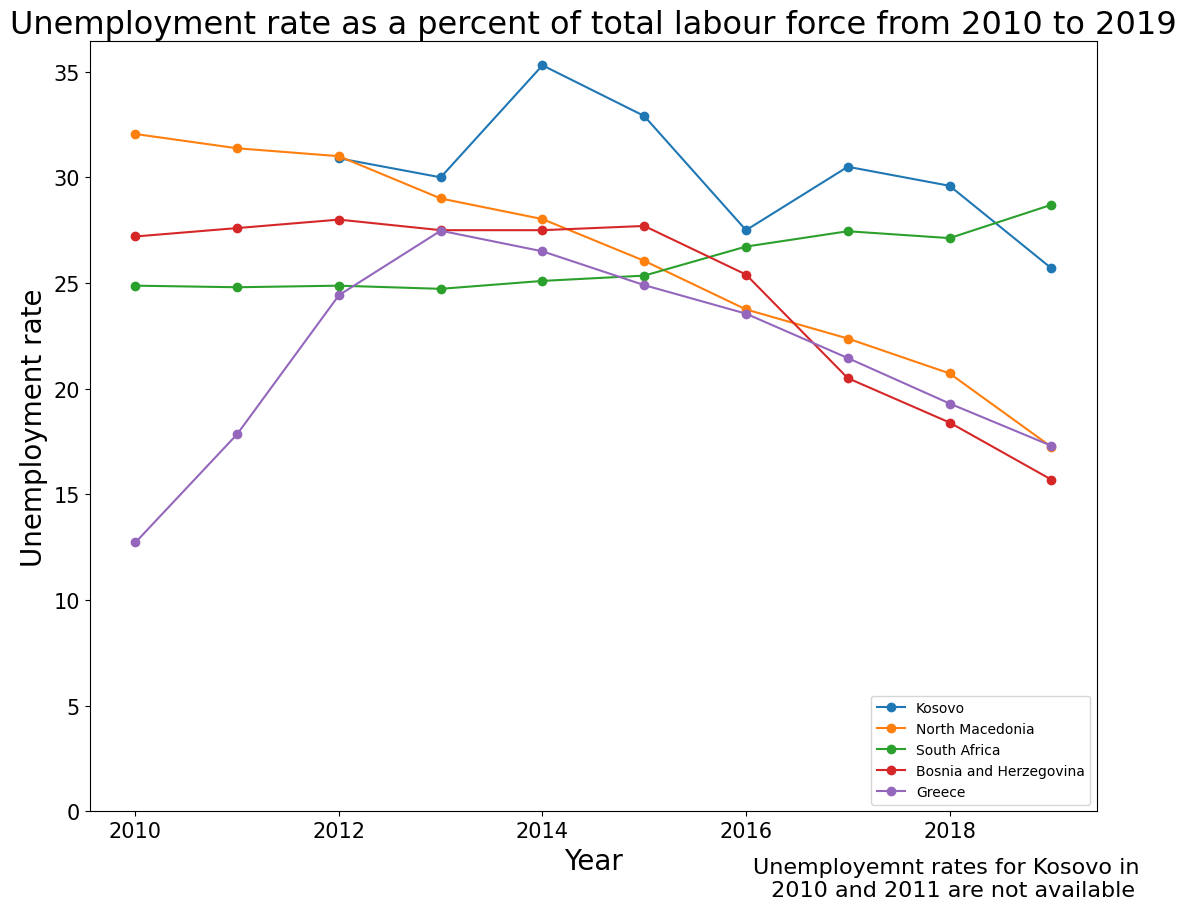

In [188]:
# | lable: fig-unemployment-rate
# | fig-cap: Unemployment rate as a percent of total labour force from 2010 to 2019

# - A properly labeled figure of size (13 by 10) must be displayed as the end result at the last code cell of this question.
# - Save the figure with a dpi of `200` and name it `imf_plot01.png` (This file is to be submitted).
_, ax = plt.subplots(1, 1, figsize=(13, 10))
df1[targeted_years].loc[top_5_country].transpose().plot(ax=ax, marker="o")
ax.set_ylabel("Unemployment rate", fontsize=20)
ax.set_xlabel("Year", fontsize=20)
ax.set_title(
    "Unemployment rate as a percent of total labour force from 2010 to 2019",
    fontsize=23,
)
ax.set_ylim(bottom=0)
plt.text(
    8,
    -4,
    "Unemployemnt rates for Kosovo in \n 2010 and 2011 are not available",
    fontsize=16,
    ha="center",
)
ax.legend(loc="lower right")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("imf_plot01.png", dpi=200)

In [189]:
df1[targeted_years].transpose().rename_axis("Year")

Country,Albania,Algeria,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,The Bahamas,Bahrain,Barbados,Belarus,Belgium,Belize,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei Darussalam,Bulgaria,Cabo Verde,Canada,Chile,China,Colombia,Costa Rica,Croatia,Cyprus,Czech Republic,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Fiji,Finland,France,Georgia,Germany,Greece,Honduras,Hong Kong SAR,Hungary,Iceland,Indonesia,Islamic Republic of Iran,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Korea,Kosovo,Kuwait,Kyrgyz Republic,Latvia,Lithuania,Luxembourg,Macao SAR,Malaysia,Malta,Mauritius,Mexico,Moldova,Mongolia,Morocco,Myanmar,Netherlands,New Zealand,Nicaragua,Nigeria,North Macedonia,Norway,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Romania,Russia,San Marino,São Tomé and Príncipe,Saudi Arabia,Serbia,Seychelles,Singapore,Slovak Republic,Slovenia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan Province of China,Tajikistan,Thailand,Trinidad and Tobago,Tunisia,Turkey,Ukraine,United Kingdom,United States,Uruguay,Venezuela,Vietnam
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,14.0,9.961,7.750,19.000,10.600,5.208,4.842,5.631,15.082,3.600,10.250,0.827,8.325,13.513,3.300,4.375,27.202,8.500,NaN,10.306,10.7,8.000,8.305,4.14,11.775,9.213,17.167,6.275,7.284,7.742,6.520,5.02,9.210,7.000,16.707,7.100,8.500,9.250,17.4,6.933,12.725,4.119,4.322,11.171,7.558,7.14,13.500,14.592,8.250,8.350,12.375,5.058,12.475,5.766,3.708,NaN,2.072,8.644,19.467,17.814,5.800,2.825,3.300,6.842,7.8,5.273,7.400,9.90,9.063,4.0,4.995,6.150,7.829,5.092,32.050,3.794,5.550,6.516,5.674,7.880,7.325,9.635,10.770,16.4,6.971,7.358,4.945,14.628,5.548,20.000,4.605,2.175,14.500,7.300,24.875,19.858,5.0,13.733,7.2,8.575,3.516,8.613,5.21,2.200,1.050,5.925,13.048,11.127,8.097,7.900,9.608,7.025,8.508,4.290
2011,14.0,9.971,7.150,18.400,8.879,5.083,4.592,5.424,15.889,4.000,11.150,0.668,7.150,13.972,3.100,3.837,27.600,7.800,9.300,11.350,12.2,7.500,7.300,4.09,10.808,10.492,17.367,7.850,6.716,7.750,7.613,4.21,10.379,6.600,12.325,7.100,7.775,9.200,17.3,5.858,17.850,4.475,3.408,11.028,7.050,6.56,12.300,15.417,7.050,8.392,12.400,4.583,12.875,5.391,3.408,NaN,2.078,8.530,16.208,15.390,5.667,2.575,3.050,6.392,7.9,5.172,6.700,7.70,8.912,4.0,4.984,5.975,5.930,5.957,31.375,3.364,5.950,4.481,5.621,7.727,7.025,9.632,12.677,15.9,7.146,6.508,5.469,14.127,5.772,23.600,4.130,2.025,13.692,8.208,24.800,21.390,4.1,12.033,7.5,7.767,2.843,NaN,4.39,2.492,0.658,5.067,18.889,9.096,7.856,8.100,8.933,6.342,8.204,4.513
2012,13.4,10.969,7.200,17.300,9.607,5.225,4.917,5.185,14.367,3.700,11.500,0.614,7.550,14.431,2.100,3.229,28.000,7.400,8.500,12.379,16.8,7.325,6.595,4.09,10.367,9.849,18.600,11.800,6.959,7.800,8.407,4.12,12.373,6.100,10.023,6.800,7.683,9.758,17.2,5.367,24.425,3.754,3.303,11.003,6.025,6.14,12.100,15.500,6.900,10.683,13.925,4.325,12.150,5.286,3.225,30.9,1.986,8.427,15.048,13.366,6.096,2.000,3.025,6.200,8.1,4.891,5.600,8.20,8.988,4.0,5.832,6.400,5.912,10.566,31.000,3.294,5.950,4.050,4.573,6.798,6.975,10.088,15.526,14.5,6.794,5.450,6.909,13.590,5.524,24.600,3.705,1.950,13.967,8.900,24.875,24.788,4.0,14.800,8.1,7.967,2.905,NaN,4.24,NaN,0.675,4.950,16.723,8.432,7.529,7.975,8.075,6.325,7.823,2.740
2013,15.9,9.829,7.075,16.200,7.599,5.658,5.333,4.973,15.782,4.392,11.625,0.508,8.450,11.680,2.900,4.000,27.500,7.200,7.700,13.038,16.4,7.100,6.082,4.05,9.658,8.311,19.808,15.850,6.942,7.383,9.196,4.15,12.992,5.900,8.628,6.367,8.192,10.300,16.9,5.233,27.475,4.096,3.376,10.178,5.392,6.25,10.400,13.775,6.250,12.133,15.275,4.008,12.600,5.206,3.100,30.0,1.902,8.332,11.868,11.770,6.821,1.850,3.100,6.108,8.0,4.901,5.100,7.90,9.235,4.0,7.257,5.750,5.746,9.955,29.000,3.773,5.975,4.098,5.021,5.945,7.075,10.328,16.183,14.3,7.096,5.500,8.079,13.525,5.568,23.000,3.325,1.900,14.242,10.150,24.725,26.095,4.4,15.200,6.6,8.000,3.158,NaN,4.18,NaN,0.700,3.675,15.330,9.041,7.172,7.575,7.358

**Q3)** Using an appropriate graph, show the comparison of how SARS (2003), H1N1 (2010) and COVID-19 (2020) have affected the "<i>Gross domestic product, constant prices</i>" (`Subject Descriptor`) for countries around South East Asia (i.e., Brunei Darussalam, Cambodia, Indonesia, Lao P.D.R., Malaysia, Myanmar, Philippines, Singapore, Thailand, Timor-Leste, Vietnam).

- Your graph should be properly annotated and numerical values should be formatted to 2 decimal places.
- A properly labeled figure of size (15 by 10) must be displayed as the end result at the last code cell of this question.
- Save the figure with a dpi of `200` and name it `imf_plot02.png` (This file is to be submitted).


In [190]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             1552 non-null   object 
 1   Subject Descriptor  1552 non-null   object 
 2   1980                827 non-null    object 
 3   1981                887 non-null    object 
 4   1982                899 non-null    object 
 5   1983                909 non-null    float64
 6   1984                915 non-null    float64
 7   1985                929 non-null    float64
 8   1986                937 non-null    object 
 9   1987                942 non-null    float64
 10  1988                955 non-null    float64
 11  1989                965 non-null    float64
 12  1990                1021 non-null   object 
 13  1991                1064 non-null   object 
 14  1992                1113 non-null   float64
 15  1993                1183 non-null   float64
 16  1994  

In [191]:
South_East_Asia = [
    c.strip()
    for c in "Brunei Darussalam, Cambodia, Indonesia, Lao P.D.R., Malaysia, Myanmar, Philippines, Singapore, Thailand, Timor-Leste, Vietnam".split(
        ","
    )
]
South_East_Asia

['Brunei Darussalam',
 'Cambodia',
 'Indonesia',
 'Lao P.D.R.',
 'Malaysia',
 'Myanmar',
 'Philippines',
 'Singapore',
 'Thailand',
 'Timor-Leste',
 'Vietnam']

In [192]:
"Gross domestic product, constant prices" in list(df["Subject Descriptor"].unique())

True

In [193]:
targeted_years = ["2003", "2010", "2020"]
df[targeted_years]

,2003,2010,2020
0,8.692,8.438,-3.007
1,20.852,44.323,74.792
2,4.398,5.431,-4.291
3,35.663,2.179,4.711
4,6.530,10.246,4.5
...,...,...,...
1547,-8.565,3.045,319.036
1548,NaN,3.217,154.297
1549,NaN,NaN,NaN
1550,NaN,0.619,-4.931


In [194]:
targeted_years = ["2003", "2010", "2020"]
df1 = df[df["Subject Descriptor"] == "Gross domestic product, constant prices"][
    ["Country", "Subject Descriptor"] + targeted_years
]

In [195]:
is_sea = df1.Country.isin(South_East_Asia)
df1[is_sea]

,Country,Subject Descriptor,2003,2010,2020
192,Brunei Darussalam,"Gross domestic product, constant prices",2.903,2.652,1.297
232,Cambodia,"Gross domestic product, constant prices",8.506,5.963,-1.587
616,Indonesia,"Gross domestic product, constant prices",4.780,6.378,0.499
744,Lao P.D.R.,"Gross domestic product, constant prices",6.179,8.018,0.723
832,Malaysia,"Gross domestic product, constant prices",5.789,7.528,-1.7
944,Myanmar,"Gross domestic product, constant prices",13.196,5.247,1.799
1088,Philippines,"Gross domestic product, constant prices",4.970,7.632,0.648
1216,Singapore,"Gross domestic product, constant prices",4.536,14.526,-3.47
1376,Thailand,"Gross domestic product, constant prices",7.189,7.513,-6.662
1384,Timor-Leste,"Gross domestic product, constant prices",-2.182,9.459,-3


In [196]:
df2 = df1[is_sea].set_index("Country")[targeted_years]
df2

,2003,2010,2020
Country,,,
Brunei Darussalam,2.903,2.652,1.297
Cambodia,8.506,5.963,-1.587
Indonesia,4.780,6.378,0.499
Lao P.D.R.,6.179,8.018,0.723
Malaysia,5.789,7.528,-1.7
Myanmar,13.196,5.247,1.799
Philippines,4.970,7.632,0.648
Singapore,4.536,14.526,-3.47
Thailand,7.189,7.513,-6.662


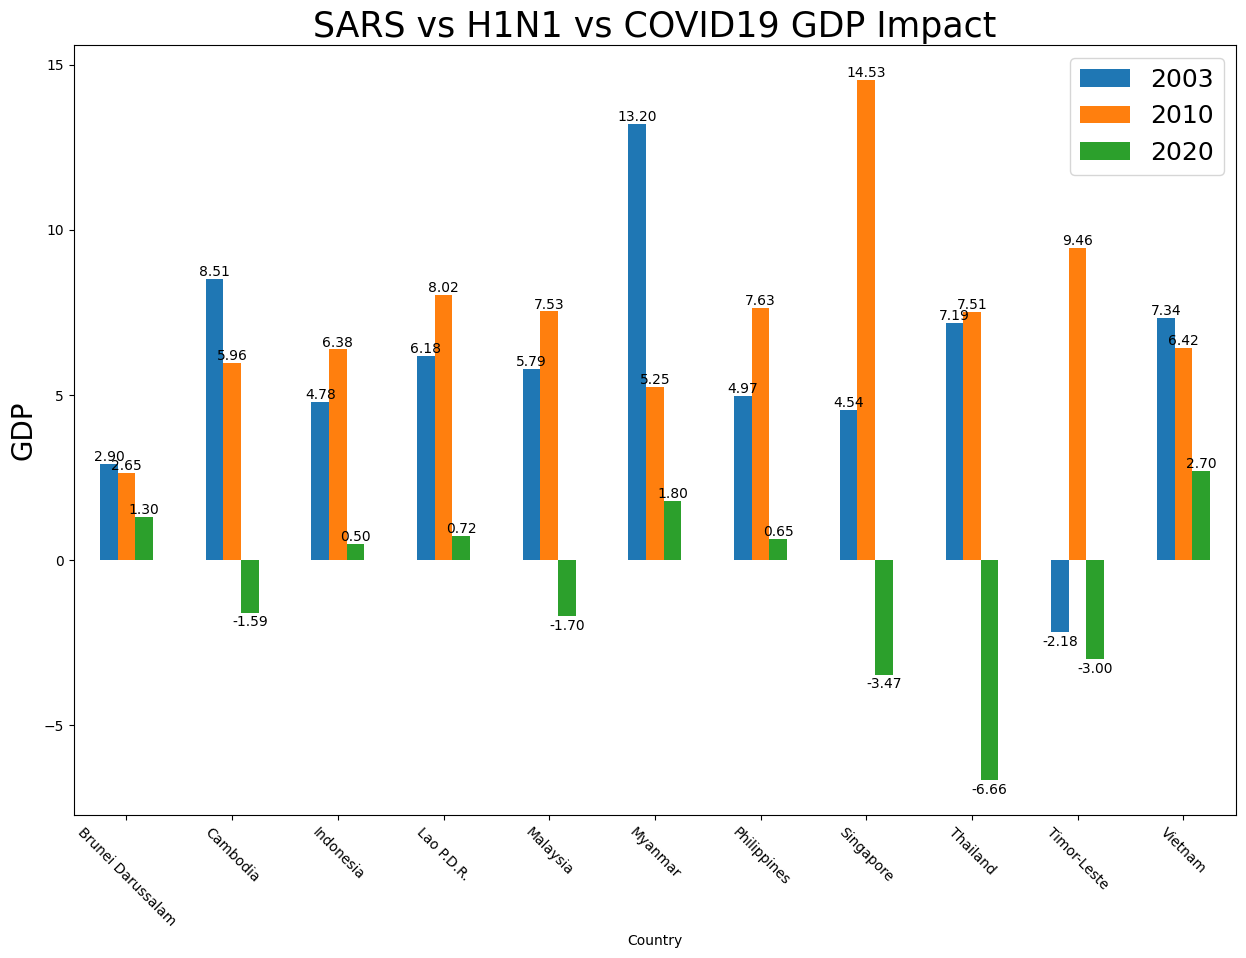

In [197]:
# | label: fig-GDP-impact
# | fig-cap: SARS vs H1N1 vs COVID19 GDP Impact

_, ax = plt.subplots(1, 1, figsize=(15, 10))
df2.plot.bar(ax=ax)
for p in ax.patches:
    offset = -0.5 if p.get_height() < 0 else 0
    ax.annotate(
        f"{p.get_height():0.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height() + offset),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )
ax.set_ylabel("GDP", fontsize=20)
ax.set_title("SARS vs H1N1 vs COVID19 GDP Impact", fontsize=25)
ax.legend(fontsize=18)
plt.xticks(rotation=-45)
plt.savefig("imf_plot02.png", dpi=200)

---

### AirBnB Open Data - New York City

**Q1)** Load the data into memory using Pandas; perform a preliminary first clean of the data and return this data.

- Perform standard checks such as missing data (`NaN` or `None`), datatypes, etc.


In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
pd.set_option("display.max_columns", None)

In [200]:
df = pd.read_csv("./datasets/AB_NYC_2019.csv")
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


**Q2)** Create a scatterplot based on the location (latitude and longitude values) from your dataset in Q1. This plot will represent the map of New York.

- A properly labeled figure of size (15 by 10) must be displayed as the end result at the last code cell of this question.
- Save the figure with a dpi of `200` and name it `airbnb_plot01.png` (This file is to be submitted).


In [201]:
# optional to import map that overlay with longitute/lattitude

In [202]:
targeted_col = ["latitude", "longitude", "neighbourhood", "neighbourhood_group"]

# missing_col =

if (df[targeted_col].isna().any(axis=0)).sum():
    print(f"Targeted attribute {targeted_col} have missing value")
else:
    print(f"Targeted attribute {targeted_col} does not have missing value")

Targeted attribute ['latitude', 'longitude', 'neighbourhood', 'neighbourhood_group'] does not have missing value


In [203]:
# Check if latitude/logitude types are numerical type required for plot
df[targeted_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             48895 non-null  float64
 1   longitude            48895 non-null  float64
 2   neighbourhood        48895 non-null  object 
 3   neighbourhood_group  48895 non-null  object 
dtypes: float64(2), object(2)
memory usage: 1.5+ MB


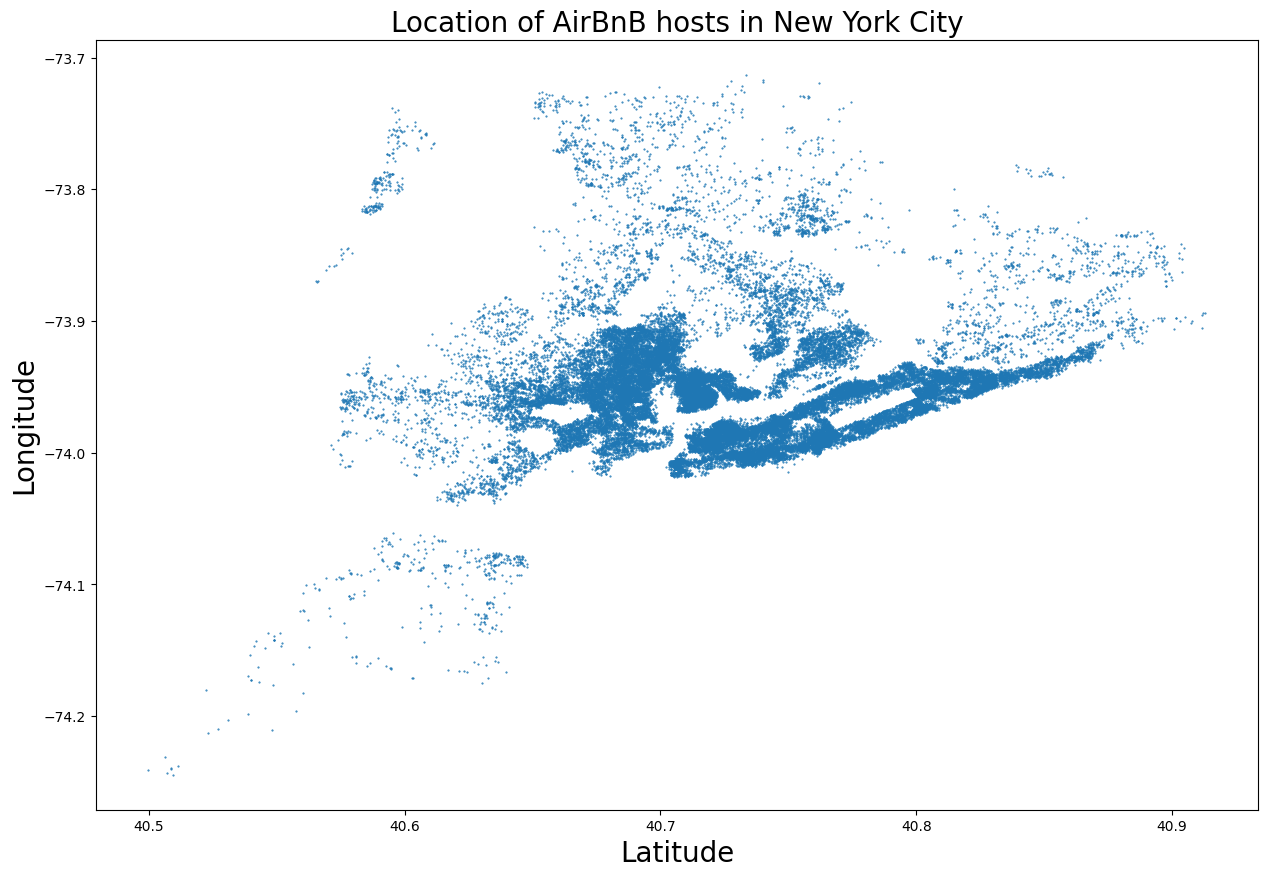

In [204]:
# scatterplot based on the location (latitude and longitude values) from your dataset in Q1. This plot will represent the map of New York.
import os

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
airbnb_plot01 = df.plot.scatter(x="latitude", y="longitude", ax=ax, marker=".", s=1)
ax.set_title("Location of AirBnB hosts in New York City", fontsize=20)
ax.set_ylabel("Longitude", fontsize=20)
ax.set_xlabel("Latitude", fontsize=20)

if os.path.exists("airbnb_plot01.png"):
    os.remove("airbnb_plot01.png")
    assert not os.path.exists("airbnb_plot01.png")
plt.savefig("airbnb_plot01.png", dpi=200)

# Todo: add landmark

Availability 365: an indicator of the total number of days the listing is available for during the year (i.e. if all the available days are rented out, then the listing’s occupancy rate is 100%)


**Q3)** A young family would like to rent an entire apartment, west of Brooklyn (Red Hook, Sunset Park, Cobble Hill, Carroll Gardens and Bay Ridge) for a maximum of 2 weeks (14 nights).

To help the young couple make an informed decision, decide on an appropriate graph, and construct **a single figure of multiple subplots (3 by 2)** to display the average cost of renting an `Entire home/apt` for a maximum of 2 weeks for each neighbourhood.

- Annotate the graphs with the average cost (integer value is permissible) of each stay.
- A properly labeled figure of size (15 by 15) must be displayed as the end result at the last code cell of this question.
- Save the figure with a dpi of `200` and name it `airbnb_plot02.png` (This file is to be submitted).


<!-- # Understand customer requirement

## west of Brooklyn

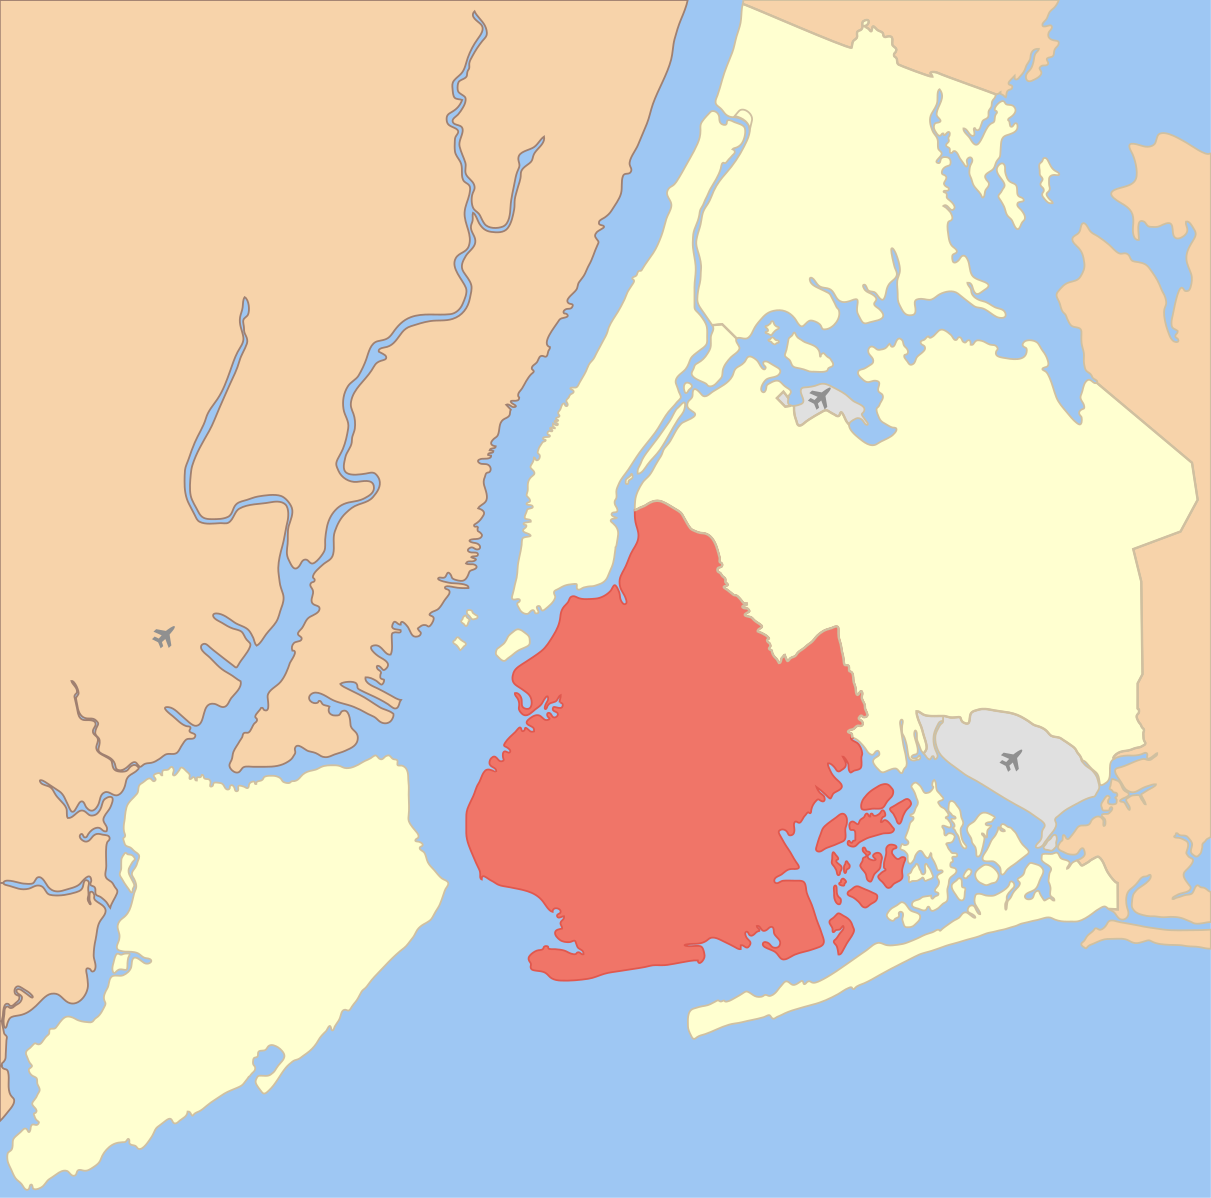 -->


In [205]:
# todo Justify is average price the best judgement?

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data for next analysis
df = pd.read_csv("./datasets/AB_NYC_2019.csv")
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


Text(0.5, 1.0, 'Location of the AirBnB hosts in the New York city according to neighbourhood')

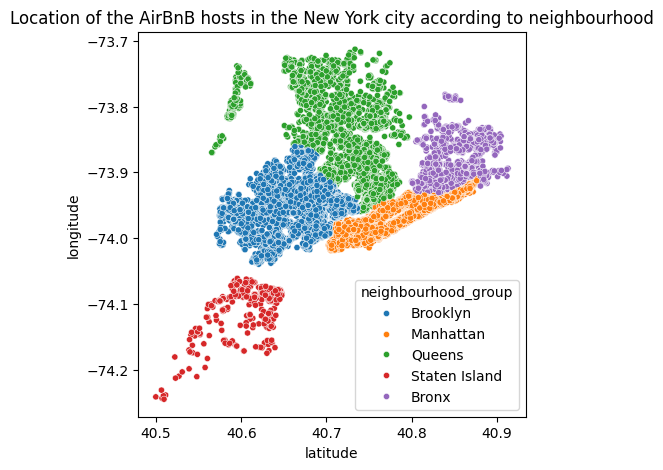

In [207]:
_, ax = plt.subplots(1, 1, figsize=(5, 5))
markers = ["o", "s", "^", "D", "X"][
    : len(df.neighbourhood_group.unique())
]  # Different marker types
# print(markers)
sns.scatterplot(
    df,
    x="latitude",
    y="longitude",
    hue="neighbourhood_group",
    ax=ax,
    # palette="viridis",
    markers=markers,
    s=20,
)
ax.set_title(
    "Location of the AirBnB hosts in the New York city according to neighbourhood"
)
# plt.legend(fontsize="large")

# Check any missing values for the targed columns


In [208]:
targeted_col = [
    "latitude",
    "longitude",
    "neighbourhood",
    "room_type",
    "price",
    "minimum_nights",
    # "neighbourhood_group",
]
targeted_col = list(set(targeted_col))
missing_value_col = df[targeted_col].isna().any()
if missing_value_col.sum():
    print(f"Targeted attributes {targeted_col} have missing values")
else:
    print(f"Targeted attributes {targeted_col} does not have missing values")

Targeted attributes ['neighbourhood', 'room_type', 'longitude', 'price', 'minimum_nights', 'latitude'] does not have missing values


In [209]:
df = df[targeted_col]
# df.info()

## Only keep rows that the customer are interested

| desired units                                                                        | dataframe filtering                                                                                      |
| ------------------------------------------------------------------------------------ | -------------------------------------------------------------------------------------------------------- |
| to rent an entire apartment,                                                         | df.room_type == "Entire home/ap"                                                                         |
| west of Brooklyn (Red Hook, Sunset Park, Cobble Hill, Carroll Gardens and Bay Ridge) | df.neighbourhood.apply(lambda x: x in ["Red Hook, Sunset Park, Cobble Hill, Carroll Gardens, Bay Ridge"] |
| for a maximum of 2 weeks (14 nights).                                                | df.minimum_nights.apply(lambda x: x>=14                                                                  |


In [210]:
df = df[targeted_col]

In [211]:
target_room_type = "Entire home/apt"
if "room_type" in df.columns:
    df = df[df.room_type == target_room_type].drop(columns=["room_type"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25409 entries, 1 to 48892
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   neighbourhood   25409 non-null  object 
 1   longitude       25409 non-null  float64
 2   price           25409 non-null  int64  
 3   minimum_nights  25409 non-null  int64  
 4   latitude        25409 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.2+ MB


In [212]:
target_neighbourhoods = [
    x.strip()
    for x in "Red Hook, Sunset Park, Cobble Hill, Carroll Gardens, Bay Ridge".split(",")
]
print("Targeted neighbourhood: ", target_neighbourhoods)

df = df[df.neighbourhood.apply(lambda x: x in target_neighbourhoods)]
# df.info()
# ans = list(map(lambda x: x in tuple(df.neighbourhood.unique()), target_neighbourhoods))
# assert sum(ans) == len(target_neighbourhoods)

Targeted neighbourhood:  ['Red Hook', 'Sunset Park', 'Cobble Hill', 'Carroll Gardens', 'Bay Ridge']


In [213]:
df = df[df.minimum_nights.apply(lambda x: x <= 14)]

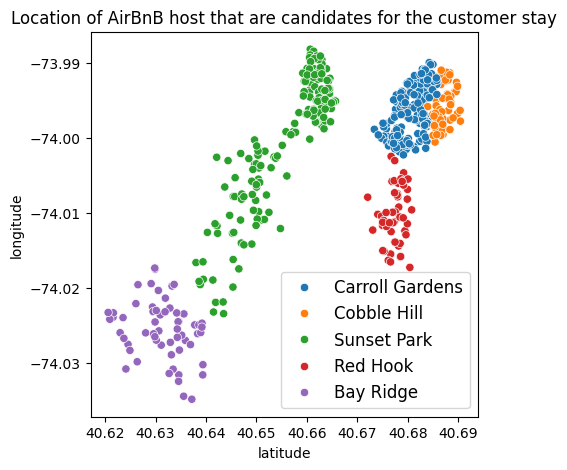

In [214]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plot = sns.scatterplot(df, x="latitude", y="longitude", hue="neighbourhood", ax=ax)
ax.set_title("Location of AirBnB host that are candidates for the customer stay")
plt.legend(fontsize="large")
plt.show()

In [215]:
# use integer type to save data frame memory
import numpy as np

df.minimum_nights = df.minimum_nights.astype(np.int8)
df.price = df.price.astype(np.int16)
# df.info()

In [216]:
# Get total cost of the stay for 1 to 14 nights
m = map(lambda n: df.minimum_nights.apply(lambda x: n if n >= x else 0), range(1, 15))
df[list(range(1, 15))] = pd.DataFrame(dict(zip(range(1, 15), m)))
df[list(range(1, 15))] = df[list(range(1, 15))].apply(lambda c: (c * df.price))
dtypes = {n: np.int16 for n in range(1, 15)}
df[list(range(1, 15))] = df[list(range(1, 15))].astype(dtypes)
display(df)
# df.info()

,neighbourhood,longitude,price,minimum_nights,latitude,1,2,3,4,5,6,7,8,9,10,11,12,13,14
101,Carroll Gardens,-74.00154,175,2,40.67967,0,350,525,700,875,1050,1225,1400,1575,1750,1925,2100,2275,2450
142,Cobble Hill,-73.99183,140,2,40.68570,0,280,420,560,700,840,980,1120,1260,1400,1540,1680,1820,1960
168,Carroll Gardens,-74.00135,165,2,40.67830,0,330,495,660,825,990,1155,1320,1485,1650,1815,1980,2145,2310
219,Cobble Hill,-73.99386,159,2,40.68926,0,318,477,636,795,954,1113,1272,1431,1590,1749,1908,2067,2226
282,Carroll Gardens,-73.99443,190,3,40.67846,0,0,570,760,950,1140,1330,1520,1710,1900,2090,2280,2470,2660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48274,Sunset Park,-73.99146,250,3,40.66294,0,0,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500
48323,Bay Ridge,-74.03145,125,5,40.63270,0,0,0,0,625,750,875,1000,1125,1250,1375,1500,1625,1750
48351,Bay Ridge,-74.02676,200,1,40.62373,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800
48657,Sunset Park,-74.00656,120,3,40.64372,0,0,360,480,600,720,840,960,1080,1200,1320,1440,1560,1680


# Total cost for staying 1 to 14 nights

The boxplot shows there's most of the total cost are below 25000, where
Cobble Hill is the most expensive are and Bay Ridge is the cheapest area.


/var/folders/rj/cfm_xnb901710wj1wr0ww8lw0000gq/T/ipykernel_83573/3967442241.py:2: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  plot = df.groupby("neighbourhood")[list(range(1, 15))].boxplot(ax=axes)


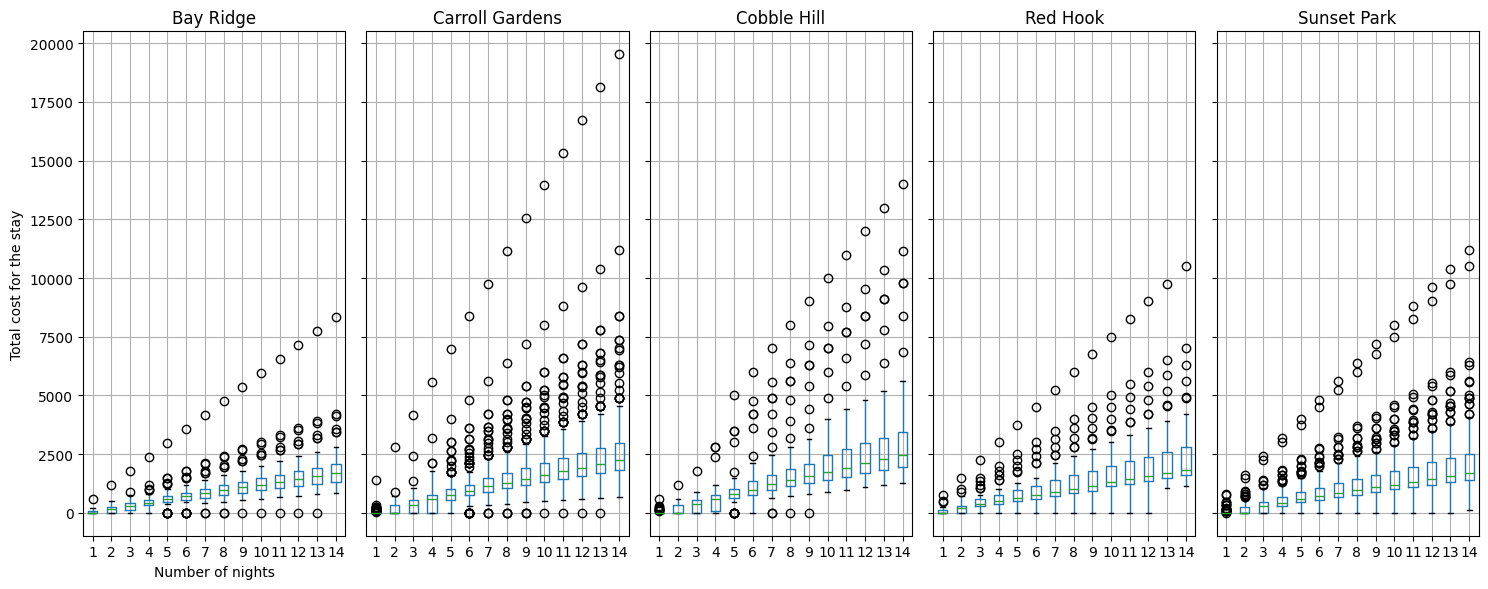

In [217]:
fig, axes = plt.subplots(1, len(target_neighbourhoods), sharey=True, figsize=(15, 6))
plot = df.groupby("neighbourhood")[list(range(1, 15))].boxplot(ax=axes)
axes[0].set_xlabel("Number of nights")
axes[0].set_ylabel("Total cost for the stay")
# plt.title(
#     "Comparison of total cost for different neighbourhood across differen number of nights"
# )
# fig.tight_layout()
plt.tight_layout()
plt.savefig("Total cost for the stay across neighbourhood and nights.jpeg")

In [218]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame

# # Group by "neighbourhood" and "minimum_nights", calculate mean of "price"
# df1 = df.groupby(["neighbourhood", "minimum_nights"])["price"].mean()

# # Unstack the DataFrame to pivot "minimum_nights" into columns
# df1_unstacked = df1.unstack(level="neigbourhood")
# display(df1_unstacked)

# # Plot
# df1_unstacked.plot(marker="o", linestyle="-")
# plt.xlabel("Minimum Nights")
# plt.ylabel("Mean Price")
# plt.title("Mean Price for each Neighbourhood across Minimum Nights")
# plt.legend(title="Neighbourhood", bbox_to_anchor=(1.05, 1), loc="upper left")
# plt.tight_layout()
# plt.show()

In [219]:
grouped = (
    df.groupby(["neighbourhood", "minimum_nights"])["price"]
    .mean()
    .reset_index()
    .set_index(["neighbourhood", "minimum_nights"])
)

dummy = {}
for n in target_neighbourhoods:
    for i in range(1, 15):
        dummy[(n, i)] = 0

index = pd.MultiIndex.from_tuples(
    dummy.keys(), names=["neighbourhood", "minimum_nights"]
)

df_dummy = (
    pd.DataFrame(dummy.values(), index=index, columns=["price"])
    .reset_index()
    .set_index(["neighbourhood", "minimum_nights"])
)

merge = grouped.combine_first(df_dummy)
merge.reset_index(inplace=True)
# merge.price = merge.price.apply(lambda x: f"{x:0.2f}")
# display(merge.head(20))

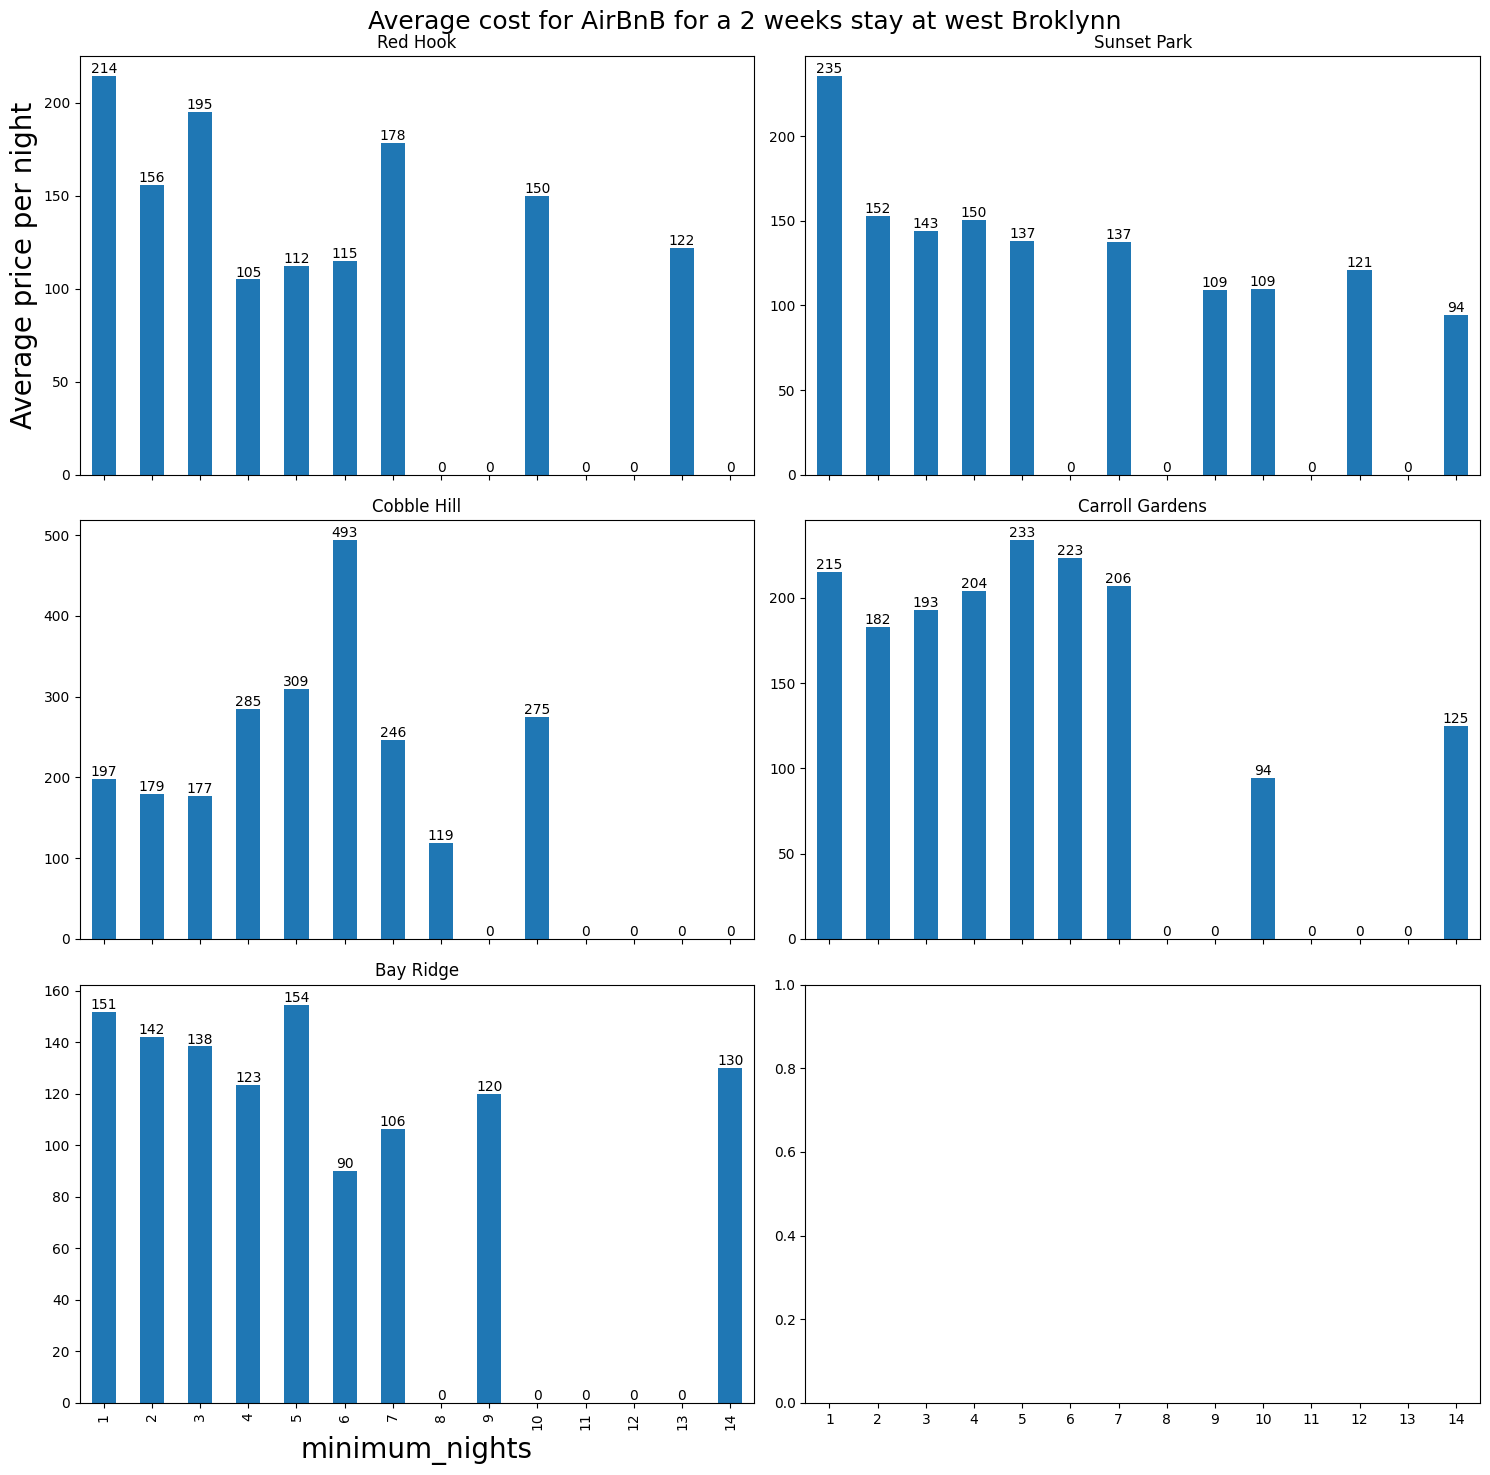

In [220]:
# Assuming df is your DataFrame
import math

fig, axes = plt.subplots(
    3,
    math.ceil(len(target_neighbourhoods) / 3),
    sharex=True,
    figsize=(15, 15),
)

# Group by "neighbourhood" and "minimum_nights", calculate mean of "price"
# display(grouped)
for i, (n, ax) in enumerate(zip(target_neighbourhoods, axes.flatten()[:-1])):
    # print(n)
    merge[merge.neighbourhood == n].plot(
        x="minimum_nights", y="price", kind="bar", ax=ax, legend=False
    )

    # Add annotations
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )

    # ax.annotate(str(value), xy=(i, value), xytext=(5, 5), textcoords='offset points', ha='center')
    ax.set_title(n)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    if i == 0:
        ax.set_ylabel("Average price per night")
        # ax.set_xlabel("Number of nights")

plt.suptitle("Average cost for AirBnB for a 2 weeks stay at west Broklynn", fontsize=18)
plt.tight_layout()
if os.path.exists("airbnb_plot02.png"):
    os.remove("airbnb_plot02.png")
    assert not (os.path.exists("airbnb_plot02.png"))
plt.savefig("airbnb_plot02.png", dpi=200)